In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,657,34,76,13,34,5,not fire
1,2,6,2012,29,61,13,13,644,41,76,1,39,4,not fire
2,3,6,2012,26,82,22,131,471,25,71,3,27,1,not fire
3,4,6,2012,25,89,13,25,286,13,69,0,17,0,not fire
4,5,6,2012,27,77,16,0,648,3,142,12,39,5,not fire


## data cleaning

In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region ForestFir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7,2012,37,37,18,2,889,129,14.6 9,125,104,fire,NaN


In [6]:
#splitting dataset to two region

df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [7]:
#save memory
df[['Region']] = df[['Region']].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,657,34,76,13,34,5,not fire,0
1,2,6,2012,29,61,13,13,644,41,76,1,39,4,not fire,0
2,3,6,2012,26,82,22,131,471,25,71,3,27,1,not fire,0
3,4,6,2012,25,89,13,25,286,13,69,0,17,0,not fire,0
4,5,6,2012,27,77,16,0,648,3,142,12,39,5,not fire,0


In [8]:
#drop 122 - region name and null values
df = df.dropna().reset_index(drop=True)

In [9]:
df.isnull().sum() # no NAN
df.iloc[[122]] #remove this raw of NAN

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [10]:
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,7,571,25,8.2,6,28,0.2,not fire,1


In [11]:

df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [12]:
# fix the spaces in the column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
# change column to interger 
df[['day','month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day','month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)


In [14]:
# convert float to float

object = [features for features in df.columns if df[features].dtypes=='O']
for i in object:
    if i != 'Classes':
        df[i] = df[i].astype(float)


In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,5.0,not fire,0
1,2,6,2012,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,4.0,not fire,0
2,3,6,2012,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,1.0,not fire,0
3,4,6,2012,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,5.0,not fire,0


In [16]:
# save cleaned dataset for future use
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

## dataset analysis

In [17]:
# no need of some columns dropping that
new_df = df.drop(['day','month', 'year'], axis=1)
new_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,5.0,not fire,0
1,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,4.0,not fire,0
2,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,1.0,not fire,0
3,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0.0,not fire,0
4,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,5.0,not fire,0


In [18]:
new_df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [19]:
# encoding 'Classes' column
new_df['Classes'] = np.where(new_df['Classes'].str.contains('not fire'), 0, 1)
new_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,5.0,0,0
1,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,4.0,0,0
2,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,1.0,0,0
3,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0.0,0,0
4,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,5.0,0,0


In [20]:
new_df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

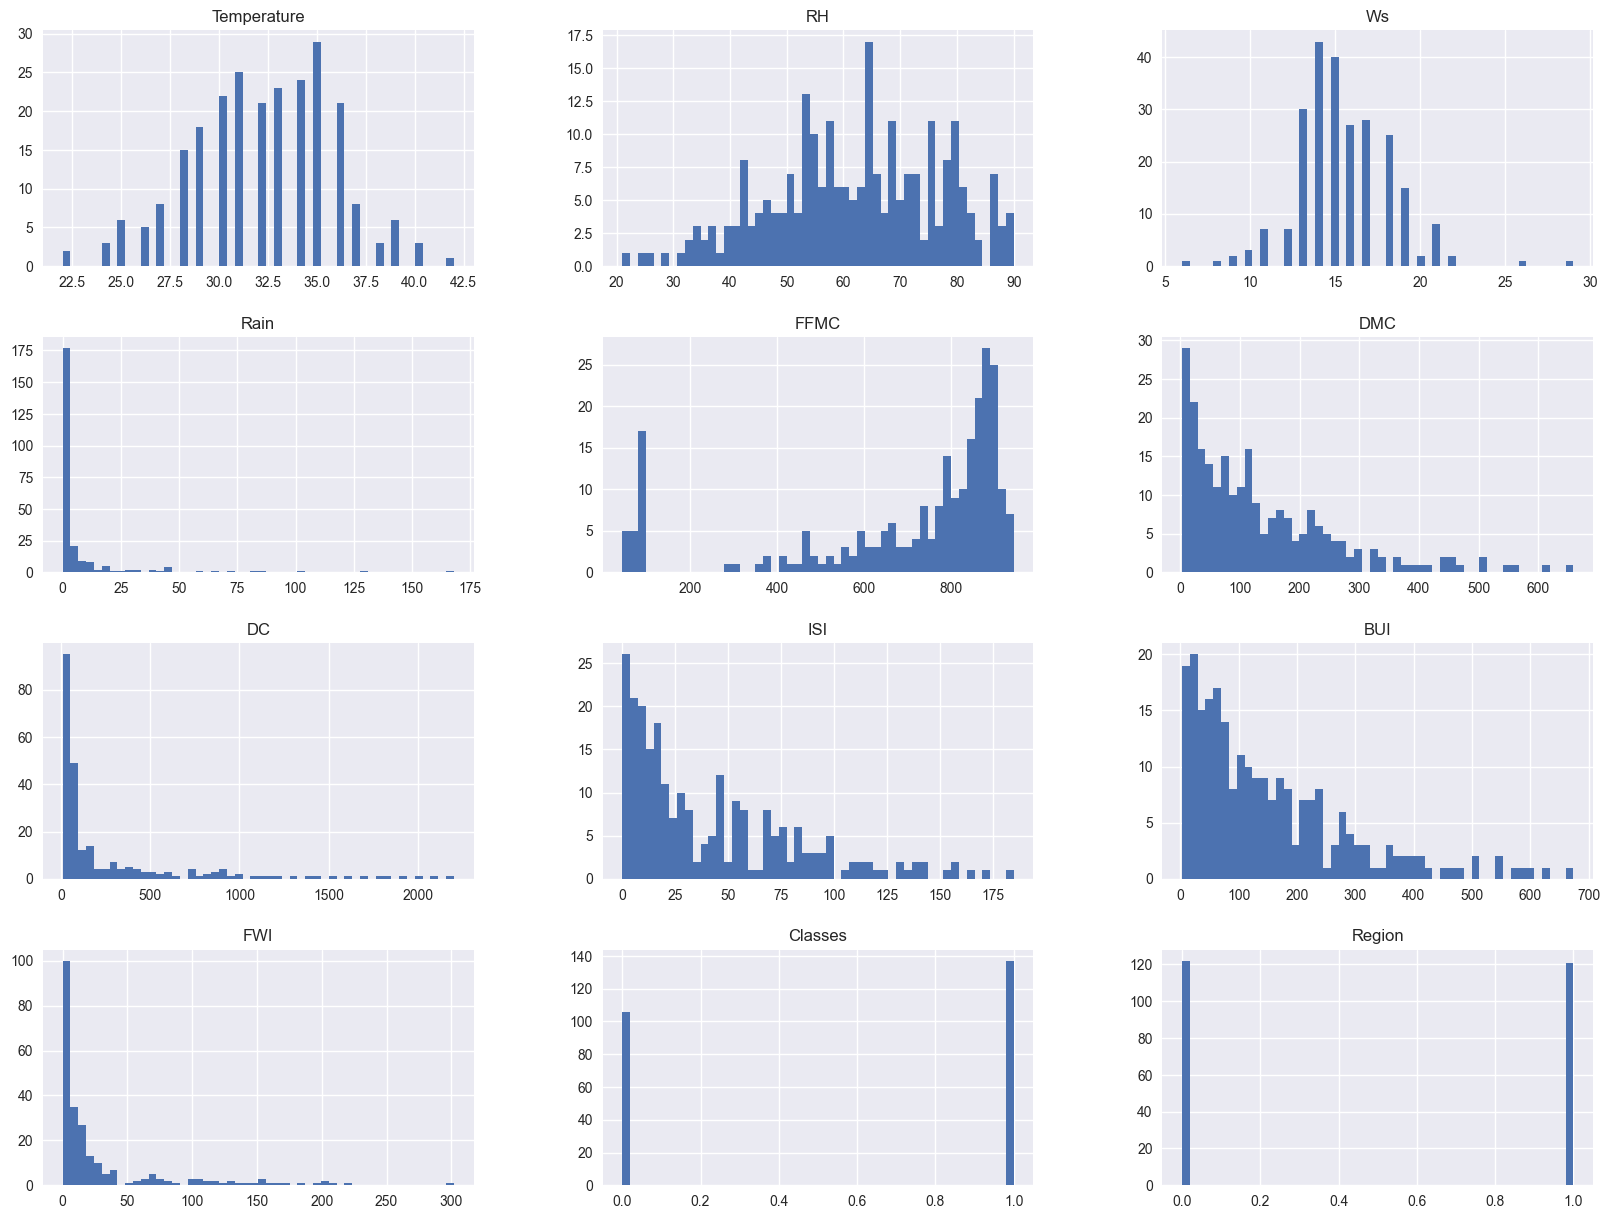

In [21]:
# plot density for all features
plt.style.use('seaborn-v0_8') 
new_df.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
# percentage of Pie Chart
percentage = new_df['Classes'].value_counts(normalize=True) * 100

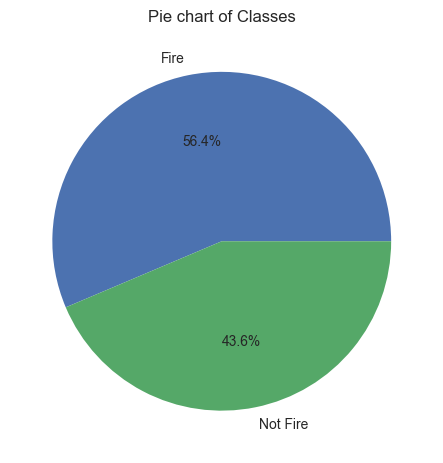

In [23]:
#plot pie chart
classLabels = ['Fire', 'Not Fire']
plt.Figure(figsize=(5,6))
plt.pie(percentage,labels=classLabels, autopct='%1.1f%%')
plt.title('Pie chart of Classes')
plt.show()

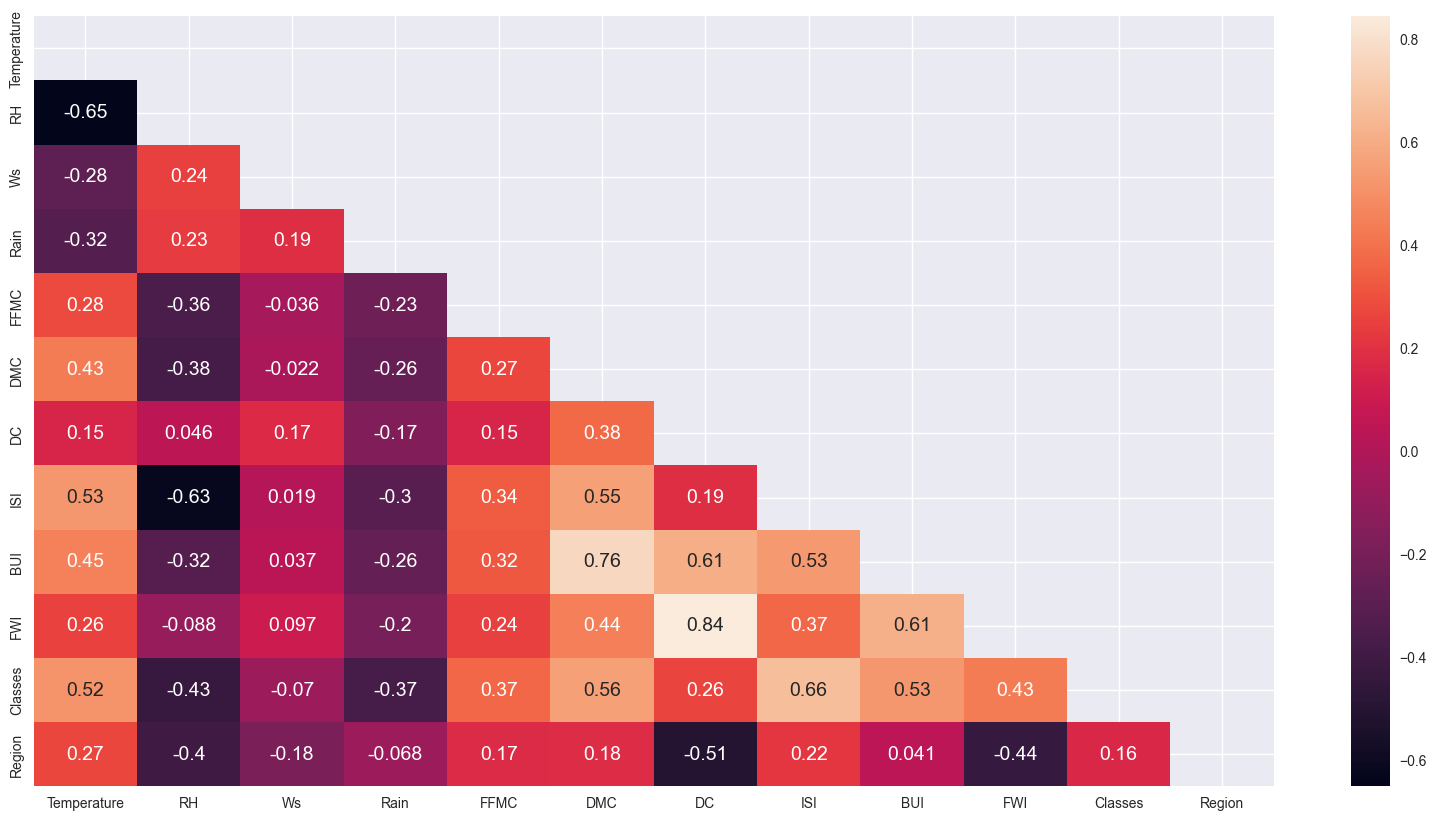

In [24]:
# correlation
mask = np.zeros_like(new_df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True # true 1 fasle 0
# visulaise the correlation
plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(), mask=mask, annot=True, annot_kws={'size' : 14})
plt.show()

In [25]:
# Monthly fire analysis Bajaia Region
df_temp = df.loc[df['Region']==0]
df_temp['Classes'] = np.where(df_temp['Classes'].str.contains('not fire'),0,1)
df_temp['Classes'].value_counts()


C:\Users\albin\AppData\Local\Temp\ipykernel_16472\3249459828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Classes'] = np.where(df_temp['Classes'].str.contains('not fire'),0,1)


Classes
0    63
1    59
Name: count, dtype: int64

In [26]:
# Monthly fire analysis sedi- bel Region
df_temp = df.loc[df['Region']==1]
df_temp['Classes'] = np.where(df_temp['Classes'].str.contains('not fire'),0,1)
df_temp['Classes'].value_counts()

C:\Users\albin\AppData\Local\Temp\ipykernel_16472\1253188872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Classes'] = np.where(df_temp['Classes'].str.contains('not fire'),0,1)


Classes
1    78
0    43
Name: count, dtype: int64

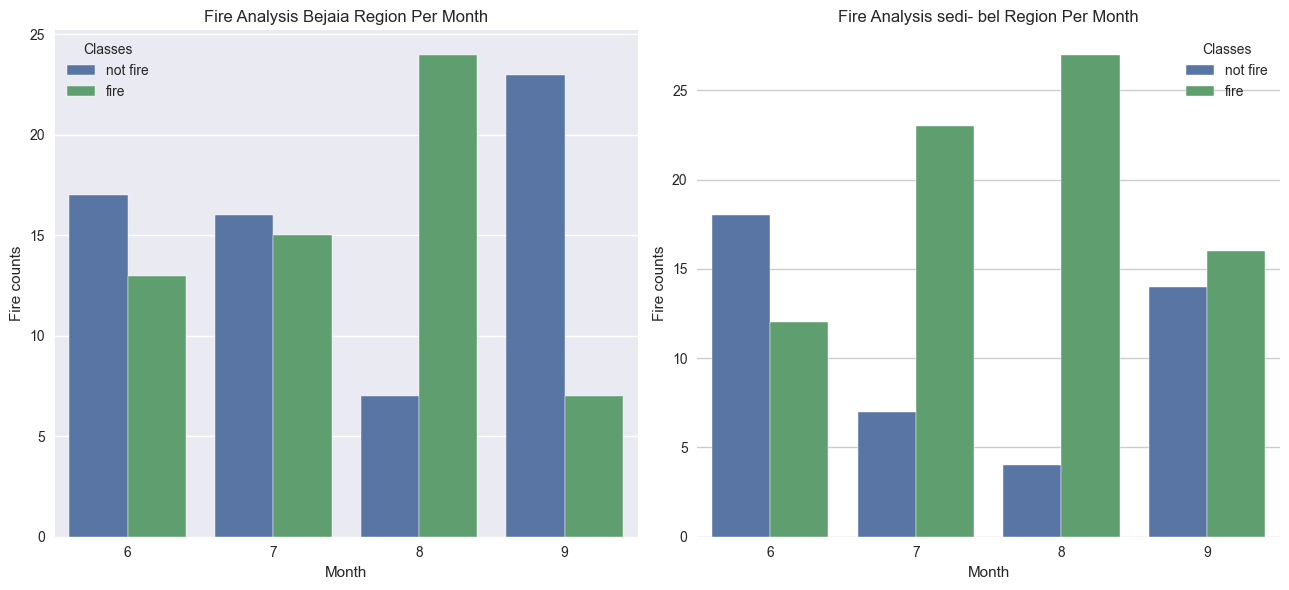

In [27]:
# Monthly fire analysis

# Bajaia Region
df_temp = df.loc[df['Region'] == 0].copy()

df_temp['Classes'] = np.where(df_temp['Classes'].str.contains('not fire'), 'not fire', 'fire')
plt.figure(figsize=(13, 6))  

plt.subplot(1, 2, 1)  
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df_temp)
plt.xlabel('Month')  
plt.ylabel('Fire counts')  
plt.title('Fire Analysis Bejaia Region Per Month')

#Sedi-bel

df_temp = df.loc[df['Region'] == 1].copy()
df_temp['Classes'] = np.where(df_temp['Classes'].str.contains('not fire'), 'not fire', 'fire')
plt.subplot(1, 2, 2)  
sns.countplot(x='month', hue='Classes', data=df_temp)
plt.xlabel('Month')  
plt.ylabel('Fire counts')  
plt.title('Fire Analysis sedi- bel Region Per Month')

# Show all subplots together
plt.tight_layout()
plt.show()


# Model Training

In [28]:
df = pd.read_csv(r"Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,5.0,not fire,0
1,2,6,2012,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,4.0,not fire,0
2,3,6,2012,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,1.0,not fire,0
3,4,6,2012,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,5.0,not fire,0


In [29]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [30]:
# drop day', 'month', 'year'
df = df.drop(['day', 'month', 'year'], axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,5.0,not fire,0
1,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,4.0,not fire,0
2,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,1.0,not fire,0
3,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0.0,not fire,0
4,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,5.0,not fire,0


In [31]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,5.0,0,0
1,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,4.0,0,0
2,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,1.0,0,0
3,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0.0,0,0
4,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,5.0,0,0


In [32]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [33]:
#divide fetaure into dependent and independent features
X = df.drop('FWI', axis=1) # df will come exept FWI
y = df['FWI']

In [34]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,0,0
1,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,0,0
2,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,0,0
3,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0,0
4,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,0,0


In [35]:
y.head()

0    5.0
1    4.0
2    1.0
3    0.0
4    5.0
Name: FWI, dtype: float64

In [36]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)

(182, 11)
(61, 11)


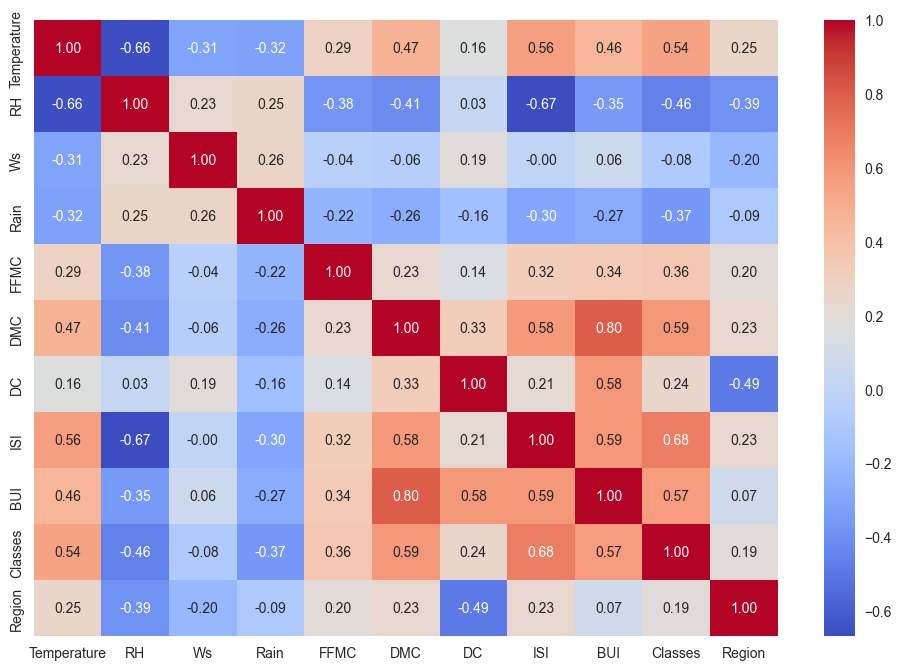

In [38]:
X_train_corr = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(X_train_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [39]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to store correlated columns
    corr_matrix = dataset.corr()  # Compute correlation matrix

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check correlation threshold
                colname = corr_matrix.columns[i]  # Get column name
                col_corr.add(colname)  # Add to the set

    return col_corr  

corr_features = correlation(X_train, 0.6)

print(corr_features)



{'ISI', 'BUI', 'RH', 'Classes'}


In [40]:
## drop feature when correlation morethan 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [41]:
print(X_train.shape)


(182, 7)


In [42]:
# feature sclaing or standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

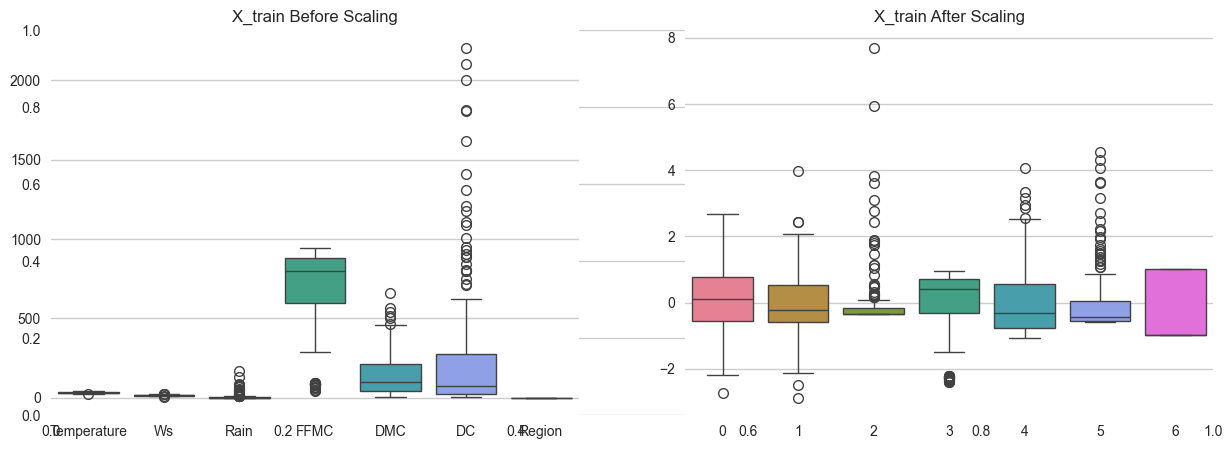

In [43]:
## box plot to understand the effect of standard scaler
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')


# Linear regression model

mean_absolute_error(mae) :  15.751338727964104
R2  :  0.8365426469784557


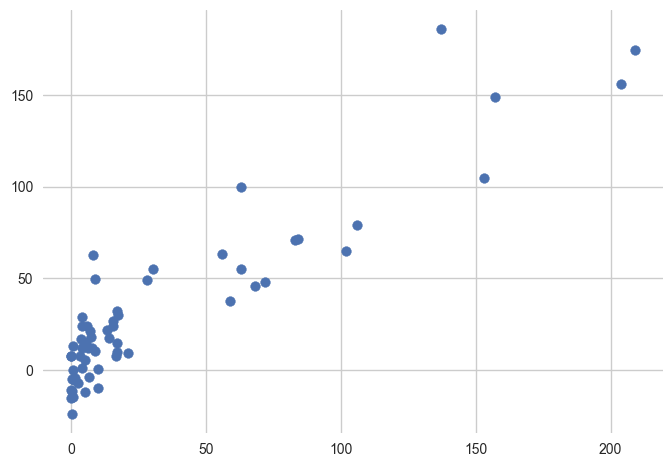

In [44]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


regr = LinearRegression()
regr.fit(X_train_scaled, y_train)

y_pred = regr.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

# Lasso Regression

In [45]:
# lasso cross validation

from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=5)
lassoCV.fit(X_train_scaled, y_train)
y_pred_lasso = lassoCV.predict(X_test_scaled)


In [46]:
lassoCV.alpha_
lassoCV.mse_path_

array([[1705.90525607, 2385.18307526, 1266.7409664 , 4796.59384682,
        2314.43755067],
       [1591.97164495, 2177.6170769 , 1184.92486808, 4796.59384682,
        2203.37578859],
       [1492.20733776, 1970.03598532, 1114.23448083, 4796.59384682,
        1950.4368283 ],
       [1404.81196894, 1793.44423752, 1053.1890551 , 4757.27372567,
        1735.18865029],
       [1328.21662597, 1643.53910923, 1000.50284115, 4417.41899074,
        1552.40217992],
       [1261.05390775, 1516.59626017,  955.05954652, 4114.61623663,
        1397.55098905],
       [1202.13186892, 1409.39318915,  915.89013019, 3844.5256348 ,
        1266.71832294],
       [1150.41134525, 1319.14274085,  882.15349795, 3603.33985354,
        1156.51633487],
       [1104.98622018, 1243.43534938,  853.11972078, 3387.71690827,
        1064.01593191],
       [1065.06625063, 1180.18887559,  828.15544683, 3194.72160937,
         986.68584345],
       [1029.96211916, 1127.60504429,  806.71122081, 3021.77449769,
         922

mean_absolute_error(mae) :  15.751338727964104
R2  :  0.8365426469784557


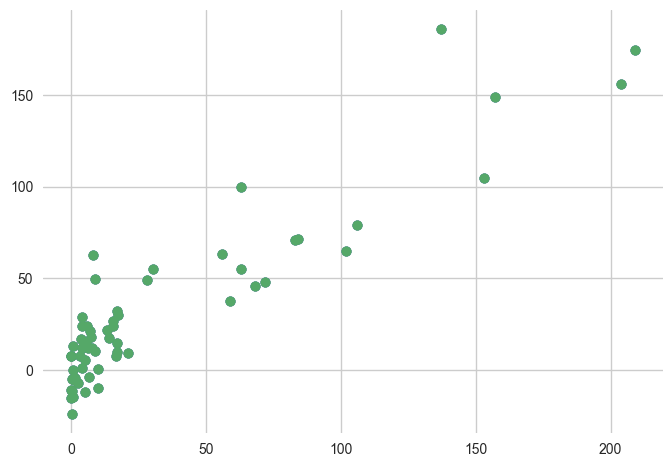

In [47]:
y_pred_lasso = lassoCV.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

plt.scatter(y_test, y_pred)

mean_absolute_error(mae) :  15.181989114721796
R2  :  0.842895190192972


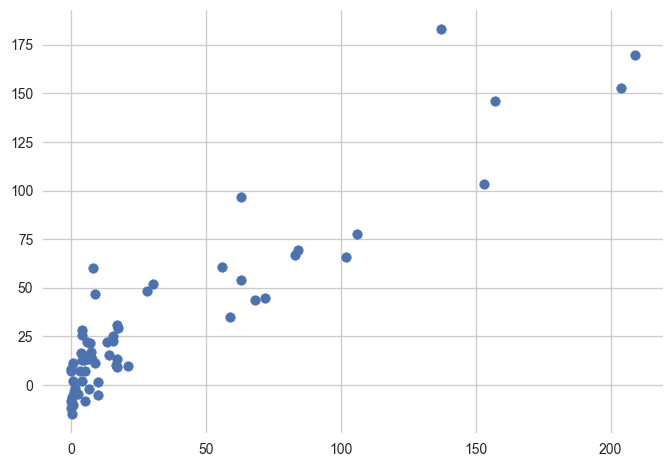

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

# Ridge Regression


mean_absolute_error(mae) :  15.786695227383568
R2  :  0.8361749233416776


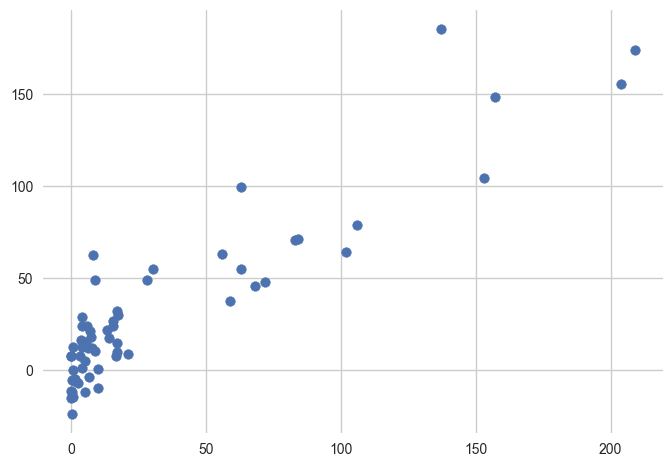

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score


ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

# ElasticNet

mean_absolute_error(mae) :  16.991351180127463
R2  :  0.7705269149399879


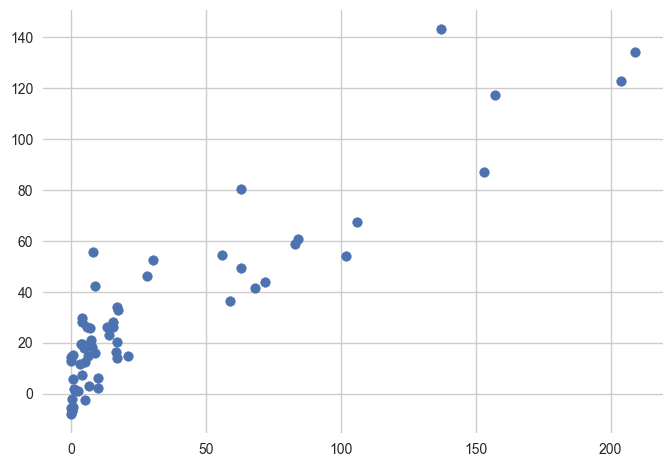

In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score


elaNet = ElasticNet()
elaNet.fit(X_train_scaled, y_train)

y_pred = elaNet.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

## Cross validation

In [52]:

import pickle
pickle.dump(ridge, open('ridge.pkl', 'wb'))
pickle.dump(regr,open('regr.pkl', 'wb'))
pickle.dump(scalar, open('scalar.pkl', 'wb'))
